In [106]:
import matplotlib.pyplot as plt
import pandas as pd
import pyterrier as pt
if not pt.started():
  pt.init()

# Indexacion

In [107]:
# Le paso el path donde se encuentran mis documento ya en formato trec
files = pt.io.find_files("./Cisi_formateado/")
files

['./Cisi_formateado/Cisi.trec']

In [108]:
#Inicializamos un indexador, para eso hay que definirle con que tipo de coleccion trabajaremos
# Como trabajamos con indices tipo trec usaremos "TRECCollectionIndexer"
# Obligatoriamente debemos darle un path local, donde se guardaran los indices generados "./custom_trec_index"
indexer = pt.TRECCollectionIndexer("C:\/Users\/AngelPC\/Desktop\/RI\/Tps2024\/RI_2024\/tp2\/Punto9\/indiceTrec", verbose=True, overwrite=True)
indexref = indexer.index(files)

18:39:18.847 [main] WARN org.terrier.indexing.MultiDocumentFileCollection - trec.encoding is not set; resorting to platform default (windows-1252). Indexing may be platform dependent. Recommend trec.encoding=UTF-8


  0%|          | 0/1 [00:00<?, ?files/s]

18:39:19.694 [main] ERROR org.terrier.structures.indexing.Indexer - Could not rename index
java.io.IOException: Rename of index structure file 'C:\/Users\/AngelPC\/Desktop\/RI\/Tps2024\/RI_2024\/tp2\/Punto9\/indiceTrec/data_1.direct.bf' (exists) to 'C:\/Users\/AngelPC\/Desktop\/RI\/Tps2024\/RI_2024\/tp2\/Punto9\/indiceTrec/data.direct.bf' (exists) failed - likely that source file is still open. Possible indexing bug?
	at org.terrier.structures.IndexUtil.renameIndex(IndexUtil.java:379)
	at org.terrier.structures.indexing.Indexer.index(Indexer.java:388)


2files [00:00,  2.38files/s]            


In [109]:
# load the index
index = pt.IndexFactory.of(indexref)

In [110]:
# Usar la función read_topics para leer el archivo de consultas
consultas_con_frecs = pt.io.read_topics("./results/q_Cisi_frecs.trec")
consultas_sin_frecs = pt.io.read_topics("./results/q_Cisi_no_frecs.trec")
# Usar la función read_qrels para leer el archivo de juicios de relevancia
qrels = pt.io.read_qrels("./results/qrels")

18:39:19.744 [main] WARN org.terrier.applications.batchquerying.TRECQuery - trec.encoding is not set; resorting to platform default (windows-1252). Retrieval may be platform dependent. Recommend trec.encoding=UTF-8
18:39:19.754 [main] WARN org.terrier.applications.batchquerying.TRECQuery - trec.encoding is not set; resorting to platform default (windows-1252). Retrieval may be platform dependent. Recommend trec.encoding=UTF-8


## Con Frecuencias TF-IDF

In [111]:
tf_idf = pt.BatchRetrieve(index, wmodel="TF_IDF")
# Definir las métricas que deseas calcular (precisión, recall y P@X)
eval_metrics = [
    "num_q", "num_ret", "num_rel", "num_rel_ret", "map", 
    "Rprec", "bpref", "recip_rank", "iprec_at_recall_0.00", 
    "iprec_at_recall_0.10", "iprec_at_recall_0.20", "iprec_at_recall_0.30", 
    "iprec_at_recall_0.40", "iprec_at_recall_0.50", "iprec_at_recall_0.60", 
    "iprec_at_recall_0.70", "iprec_at_recall_0.80", "iprec_at_recall_0.90", 
    "iprec_at_recall_1.00", "P_5", "P_10", "P_15", "P_20", "P_30", 
    "P_100", "P_200", "P_500", "P_1000"
]

# Ejecutar el experimento solo para el sistema TF-IDF
resultados_tfidf_con_frecs = pt.Experiment(
    [tf_idf],
    consultas_con_frecs,
    qrels,
    eval_metrics=eval_metrics,
    names=["TF_IDF"]
)
resultados_tfidf_con_frecs

,name,num_q,num_ret,num_rel,num_rel_ret,map,Rprec,bpref,recip_rank,iprec_at_recall_0.00,...,iprec_at_recall_1.00,P_5,P_10,P_15,P_20,P_30,P_100,P_200,P_500,P_1000
0,TF_IDF,76.0,65535.0,3114.0,2743.0,0.230075,0.257269,0.899449,0.672624,0.715474,...,0.015327,0.442105,0.360526,0.317544,0.290132,0.249123,0.153421,0.107763,0.061842,0.036092


In [112]:
# Mostrar Tabla de P@X
tabla_tfidf_con_frecs = resultados_tfidf_con_frecs.melt(value_vars=["P_5", "P_10", "P_15", 
                                    "P_20", "P_30", "P_100", 
                                    "P_200", "P_500", "P_1000"], var_name="P@X", value_name="Value")
tabla_tfidf_con_frecs

,P@X,Value
0,P_5,0.442105
1,P_10,0.360526
2,P_15,0.317544
3,P_20,0.290132
4,P_30,0.249123
5,P_100,0.153421
6,P_200,0.107763
7,P_500,0.061842
8,P_1000,0.036092


In [113]:
# Mostrar R–P en los 11 puntos standard
df_11puntos_tfidf_con_frec = resultados_tfidf_con_frecs.melt(value_vars=["iprec_at_recall_0.00","iprec_at_recall_0.10", "iprec_at_recall_0.20", "iprec_at_recall_0.30", 
                                    "iprec_at_recall_0.40", "iprec_at_recall_0.50", "iprec_at_recall_0.60", 
                                    "iprec_at_recall_0.70", "iprec_at_recall_0.80", "iprec_at_recall_0.90", 
                                    "iprec_at_recall_1.00"], var_name="Recall", value_name="Precision")
# Modificar los valores de recall
df_11puntos_tfidf_con_frec['Recall'] = df_11puntos_tfidf_con_frec['Recall'].apply(lambda x: float(x.split('_')[-1]))

df_11puntos_tfidf_con_frec

,Recall,Precision
0,0.0,0.715474
1,0.1,0.494026
2,0.2,0.384637
3,0.3,0.276709
4,0.4,0.230806
5,0.5,0.206150
6,0.6,0.170184
7,0.7,0.127931
8,0.8,0.093429
9,0.9,0.054718


## Sin Frecuencias TF-IDF

In [114]:
tf_idf = pt.BatchRetrieve(index, wmodel="TF_IDF")
# Definir las métricas que deseas calcular (precisión, recall y P@X)
eval_metrics = [
    "num_q", "num_ret", "num_rel", "num_rel_ret", "map", 
    "Rprec", "bpref", "recip_rank", "iprec_at_recall_0.00", 
    "iprec_at_recall_0.10", "iprec_at_recall_0.20", "iprec_at_recall_0.30", 
    "iprec_at_recall_0.40", "iprec_at_recall_0.50", "iprec_at_recall_0.60", 
    "iprec_at_recall_0.70", "iprec_at_recall_0.80", "iprec_at_recall_0.90", 
    "iprec_at_recall_1.00", "P_5", "P_10", "P_15", "P_20", "P_30", 
    "P_100", "P_200", "P_500", "P_1000"
]

# Ejecutar el experimento solo para el sistema TF-IDF
resultados_tfidf_sin_frecs = pt.Experiment(
    [tf_idf],
    consultas_sin_frecs,
    qrels,
    eval_metrics=eval_metrics,
    names=["TF_IDF"]
)
resultados_tfidf_sin_frecs

,name,num_q,num_ret,num_rel,num_rel_ret,map,Rprec,bpref,recip_rank,iprec_at_recall_0.00,...,iprec_at_recall_1.00,P_5,P_10,P_15,P_20,P_30,P_100,P_200,P_500,P_1000
0,TF_IDF,76.0,65535.0,3114.0,2730.0,0.187836,0.216855,0.894258,0.60071,0.633389,...,0.01347,0.357895,0.309211,0.292105,0.259211,0.226754,0.147368,0.105132,0.060711,0.035921


In [115]:
# Mostrar Tabla de P@X
tabla_tfidf_sin_frecs = resultados_tfidf_sin_frecs.melt(value_vars=["P_5", "P_10", "P_15", 
                                    "P_20", "P_30", "P_100", 
                                    "P_200", "P_500", "P_1000"], var_name="P@X", value_name="Value")
tabla_tfidf_sin_frecs

,P@X,Value
0,P_5,0.357895
1,P_10,0.309211
2,P_15,0.292105
3,P_20,0.259211
4,P_30,0.226754
5,P_100,0.147368
6,P_200,0.105132
7,P_500,0.060711
8,P_1000,0.035921


In [116]:
# Mostrar R–P en los 11 puntos standard
df_11puntos_tfidf_sin_frec = resultados_tfidf_sin_frecs.melt(value_vars=["iprec_at_recall_0.00","iprec_at_recall_0.10", "iprec_at_recall_0.20", "iprec_at_recall_0.30", 
                                    "iprec_at_recall_0.40", "iprec_at_recall_0.50", "iprec_at_recall_0.60", 
                                    "iprec_at_recall_0.70", "iprec_at_recall_0.80", "iprec_at_recall_0.90", 
                                    "iprec_at_recall_1.00"], var_name="Recall", value_name="Precision")
# Modificar los valores de recall
df_11puntos_tfidf_sin_frec['Recall'] = df_11puntos_tfidf_sin_frec['Recall'].apply(lambda x: float(x.split('_')[-1]))

df_11puntos_tfidf_sin_frec

,Recall,Precision
0,0.0,0.633389
1,0.1,0.403053
2,0.2,0.307878
3,0.3,0.229914
4,0.4,0.187964
5,0.5,0.164513
6,0.6,0.141030
7,0.7,0.096709
8,0.8,0.072275
9,0.9,0.039346


## Sin Frecuencias - HIEMTRA LM

In [117]:
hlm = pt.BatchRetrieve(index, wmodel="Hiemstra_LM")
# Definir las métricas que deseas calcular (precisión, recall y P@X)
eval_metrics = [
    "num_q", "num_ret", "num_rel", "num_rel_ret", "map", 
    "Rprec", "bpref", "recip_rank", "iprec_at_recall_0.00", 
    "iprec_at_recall_0.10", "iprec_at_recall_0.20", "iprec_at_recall_0.30", 
    "iprec_at_recall_0.40", "iprec_at_recall_0.50", "iprec_at_recall_0.60", 
    "iprec_at_recall_0.70", "iprec_at_recall_0.80", "iprec_at_recall_0.90", 
    "iprec_at_recall_1.00", "P_5", "P_10", "P_15", "P_20", "P_30", 
    "P_100", "P_200", "P_500", "P_1000"
]

# Ejecutar el experimento solo para el sistema TF-IDF
resultados_hlm_sin_frecs = pt.Experiment(
    [hlm],
    consultas_sin_frecs,
    qrels,
    eval_metrics=eval_metrics,
    names=["Hiemstra_LM"]
)
resultados_hlm_sin_frecs

,name,num_q,num_ret,num_rel,num_rel_ret,map,Rprec,bpref,recip_rank,iprec_at_recall_0.00,...,iprec_at_recall_1.00,P_5,P_10,P_15,P_20,P_30,P_100,P_200,P_500,P_1000
0,Hiemstra_LM,76.0,65535.0,3114.0,2720.0,0.180204,0.215844,0.893409,0.574143,0.612884,...,0.011804,0.352632,0.286842,0.264912,0.243421,0.214912,0.138816,0.103026,0.059842,0.035789


In [118]:
# Mostrar Tabla de P@X
tabla_hlm_sin_frecs = resultados_hlm_sin_frecs.melt(value_vars=["P_5", "P_10", "P_15", 
                                    "P_20", "P_30", "P_100", 
                                    "P_200", "P_500", "P_1000"], var_name="P@X", value_name="Value")
tabla_hlm_sin_frecs

,P@X,Value
0,P_5,0.352632
1,P_10,0.286842
2,P_15,0.264912
3,P_20,0.243421
4,P_30,0.214912
5,P_100,0.138816
6,P_200,0.103026
7,P_500,0.059842
8,P_1000,0.035789


In [119]:
# Mostrar R–P en los 11 puntos standard
df_11puntos_hlm_sin_frec = resultados_hlm_sin_frecs.melt(value_vars=["iprec_at_recall_0.00","iprec_at_recall_0.10", "iprec_at_recall_0.20", "iprec_at_recall_0.30", 
                                    "iprec_at_recall_0.40", "iprec_at_recall_0.50", "iprec_at_recall_0.60", 
                                    "iprec_at_recall_0.70", "iprec_at_recall_0.80", "iprec_at_recall_0.90", 
                                    "iprec_at_recall_1.00"], var_name="Recall", value_name="Precision")
# Modificar los valores de recall
df_11puntos_hlm_sin_frec['Recall'] = df_11puntos_hlm_sin_frec['Recall'].apply(lambda x: float(x.split('_')[-1]))

df_11puntos_hlm_sin_frec

,Recall,Precision
0,0.0,0.612884
1,0.1,0.376425
2,0.2,0.282909
3,0.3,0.225167
4,0.4,0.190145
5,0.5,0.163096
6,0.6,0.132717
7,0.7,0.094124
8,0.8,0.071808
9,0.9,0.038235


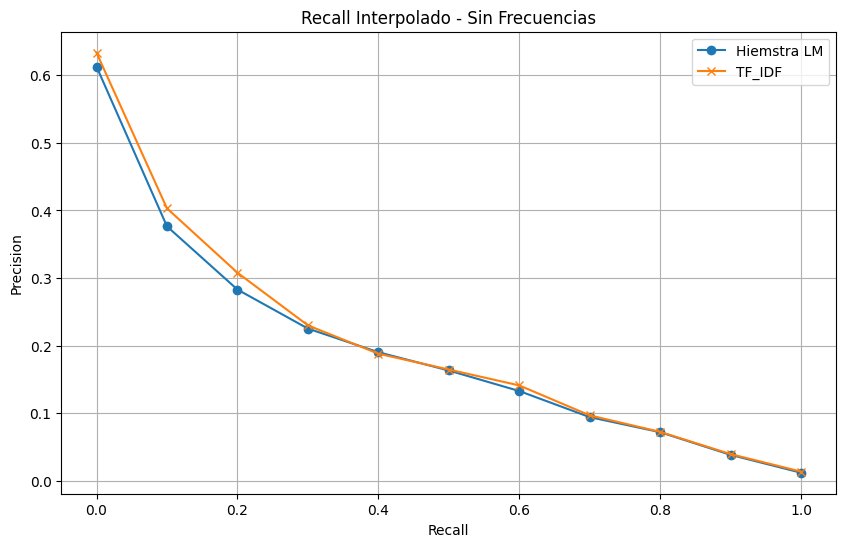

In [129]:
# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))  # Establecer el tamaño del gráfico
plt.plot(df_11puntos_hlm_sin_frec['Recall'], df_11puntos_hlm_sin_frec['Precision'], marker='o', linestyle='-', label='Hiemstra LM')  # Graficar la primera línea
plt.plot(df_11puntos_tfidf_sin_frec['Recall'], df_11puntos_tfidf_sin_frec['Precision'], marker='x', linestyle='-', label='TF_IDF')  # Graficar la segunda línea
plt.title('Recall Interpolado - Sin Frecuencias')  # Establecer el título del gráfico
plt.xlabel('Recall')  # Etiqueta del eje x
plt.ylabel('Precision')  # Etiqueta del eje y
plt.grid(True)  # Activar la cuadrícula en el gráfico
plt.legend()  # Mostrar leyenda
plt.show()  # Mostrar el gráfico

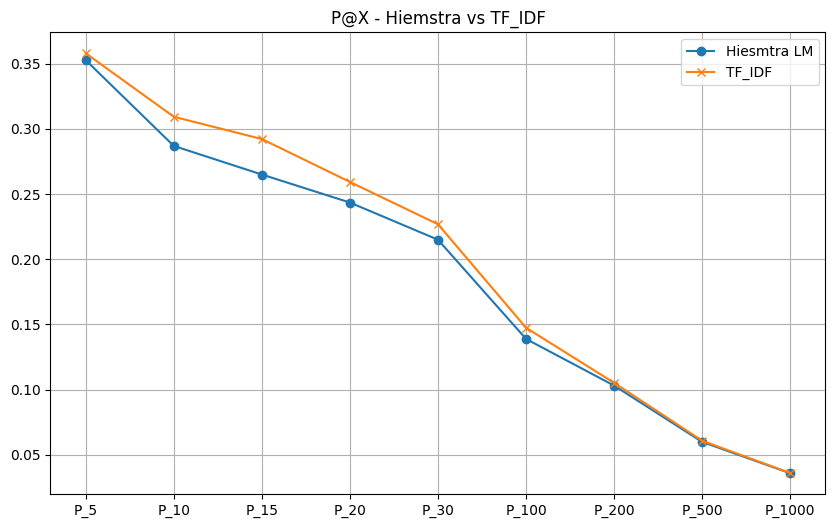

In [121]:
plt.figure(figsize=(10, 6))
plt.plot(tabla_hlm_sin_frecs['P@X'], tabla_hlm_sin_frecs['Value'], marker='o', label='Hiesmtra LM')
plt.plot(tabla_tfidf_sin_frecs['P@X'], tabla_tfidf_sin_frecs['Value'], marker='x', label='TF_IDF')
plt.title('P@X - Hiemstra vs TF_IDF - Sin Frecuencias')
plt.grid(True)
plt.legend()
plt.show()

## Con Frecuencias - Hiemstra LM

In [122]:
hlm = pt.BatchRetrieve(index, wmodel="Hiemstra_LM")
# Definir las métricas que deseas calcular (precisión, recall y P@X)
eval_metrics = [
    "num_q", "num_ret", "num_rel", "num_rel_ret", "map", 
    "Rprec", "bpref", "recip_rank", "iprec_at_recall_0.00", 
    "iprec_at_recall_0.10", "iprec_at_recall_0.20", "iprec_at_recall_0.30", 
    "iprec_at_recall_0.40", "iprec_at_recall_0.50", "iprec_at_recall_0.60", 
    "iprec_at_recall_0.70", "iprec_at_recall_0.80", "iprec_at_recall_0.90", 
    "iprec_at_recall_1.00", "P_5", "P_10", "P_15", "P_20", "P_30", 
    "P_100", "P_200", "P_500", "P_1000"
]

# Ejecutar el experimento solo para el sistema TF-IDF
resultados_hlm_con_frecs = pt.Experiment(
    [hlm],
    consultas_con_frecs,
    qrels,
    eval_metrics=eval_metrics,
    names=["Hiemstra_LM"]
)
resultados_hlm_con_frecs

,name,num_q,num_ret,num_rel,num_rel_ret,map,Rprec,bpref,recip_rank,iprec_at_recall_0.00,...,iprec_at_recall_1.00,P_5,P_10,P_15,P_20,P_30,P_100,P_200,P_500,P_1000
0,Hiemstra_LM,76.0,65535.0,3114.0,2732.0,0.228591,0.249289,0.896682,0.6573,0.694986,...,0.01844,0.444737,0.352632,0.317544,0.281579,0.240351,0.144474,0.105,0.061158,0.035947


In [123]:
# Mostrar Tabla de P@X
tabla_hlm_con_frecs = resultados_hlm_con_frecs.melt(value_vars=["P_5", "P_10", "P_15", 
                                    "P_20", "P_30", "P_100", 
                                    "P_200", "P_500", "P_1000"], var_name="P@X", value_name="Value")
tabla_hlm_con_frecs

,P@X,Value
0,P_5,0.444737
1,P_10,0.352632
2,P_15,0.317544
3,P_20,0.281579
4,P_30,0.240351
5,P_100,0.144474
6,P_200,0.105000
7,P_500,0.061158
8,P_1000,0.035947


In [124]:
# Mostrar R–P en los 11 puntos standard
df_11puntos_hlm_con_frec = resultados_hlm_con_frecs.melt(value_vars=["iprec_at_recall_0.00","iprec_at_recall_0.10", "iprec_at_recall_0.20", "iprec_at_recall_0.30", 
                                    "iprec_at_recall_0.40", "iprec_at_recall_0.50", "iprec_at_recall_0.60", 
                                    "iprec_at_recall_0.70", "iprec_at_recall_0.80", "iprec_at_recall_0.90", 
                                    "iprec_at_recall_1.00"], var_name="Recall", value_name="Precision")
# Modificar los valores de recall
df_11puntos_hlm_con_frec['Recall'] = df_11puntos_hlm_con_frec['Recall'].apply(lambda x: float(x.split('_')[-1]))

df_11puntos_hlm_con_frec

,Recall,Precision
0,0.0,0.694986
1,0.1,0.486041
2,0.2,0.373879
3,0.3,0.280092
4,0.4,0.236751
5,0.5,0.211536
6,0.6,0.171494
7,0.7,0.130280
8,0.8,0.098779
9,0.9,0.058488


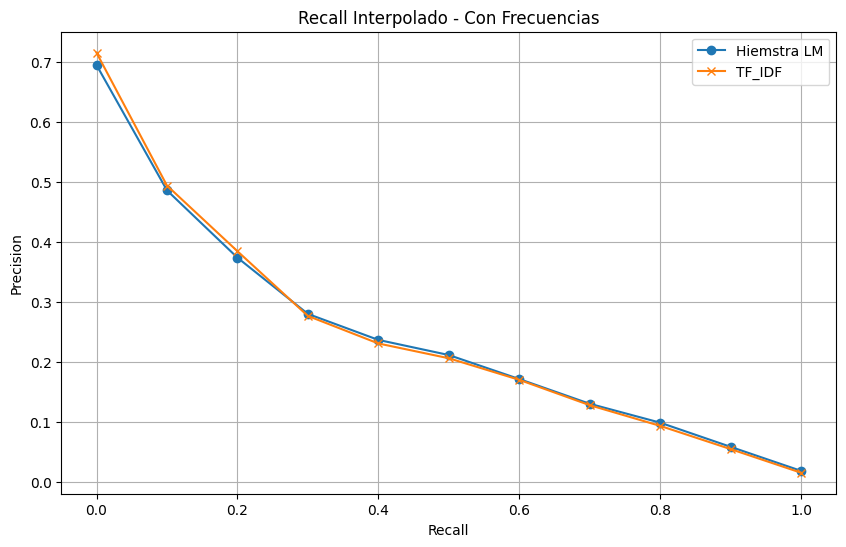

In [131]:
# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))  # Establecer el tamaño del gráfico
plt.plot(df_11puntos_hlm_con_frec['Recall'], df_11puntos_hlm_con_frec['Precision'], marker='o', linestyle='-', label='Hiemstra LM')  # Graficar la primera línea
plt.plot(df_11puntos_tfidf_con_frec['Recall'], df_11puntos_tfidf_con_frec['Precision'], marker='x', linestyle='-', label='TF_IDF')  # Graficar la segunda línea
plt.title('Recall Interpolado - Con Frecuencias')  # Establecer el título del gráfico
plt.xlabel('Recall')  # Etiqueta del eje x
plt.ylabel('Precision')  # Etiqueta del eje y
plt.grid(True)  # Activar la cuadrícula en el gráfico
plt.legend()  # Mostrar leyenda
plt.show()  # Mostrar el gráfico

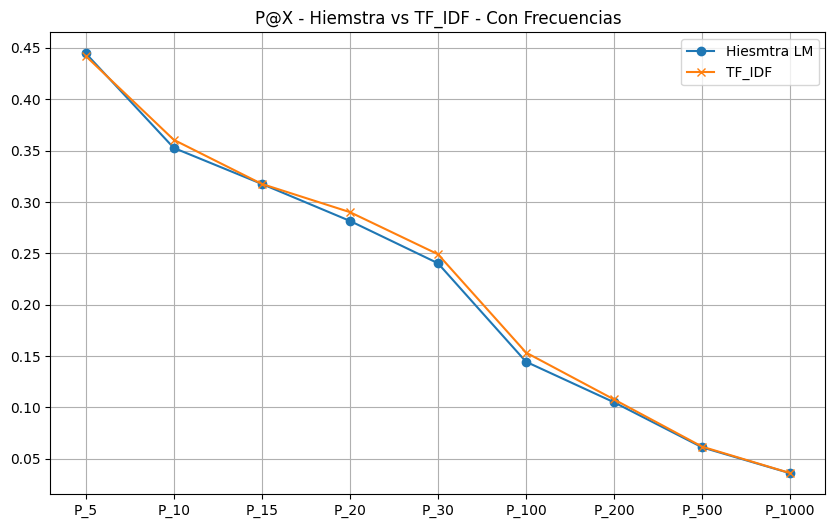

In [127]:
plt.figure(figsize=(10, 6))
plt.plot(tabla_hlm_con_frecs['P@X'], tabla_hlm_con_frecs['Value'], marker='o', label='Hiesmtra LM')
plt.plot(tabla_tfidf_con_frecs['P@X'], tabla_tfidf_con_frecs['Value'], marker='x', label='TF_IDF')
plt.title('P@X - Hiemstra vs TF_IDF - Con Frecuencias')
plt.grid(True)
plt.legend()
plt.show()

In [148]:
tf_idf = pt.BatchRetrieve(index, wmodel="TF_IDF")
hlm = pt.BatchRetrieve(index, wmodel="Hiemstra_LM")
pt.Experiment([tf_idf, hlm], consultas_sin_frecs, qrels, eval_metrics=["map", "ndcg"])

,name,map,ndcg
0,BR(TF_IDF),0.187836,0.547212
1,BR(Hiemstra_LM),0.180204,0.539450


In [149]:
pt.Experiment([tf_idf, hlm], consultas_con_frecs, qrels, eval_metrics=["map", "ndcg"])

,name,map,ndcg
0,BR(TF_IDF),0.230075,0.584667
1,BR(Hiemstra_LM),0.228591,0.580327
